<a href="https://colab.research.google.com/github/RebreaQ/Test/blob/main/Test_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gzip
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
import gzip
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
f = gzip.open('train-images-idx3-ubyte-32x32.gz','r')

image_size = 32
num_images = 60000
train = {}
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train['features'] = data.reshape(num_images, image_size, image_size, 1)

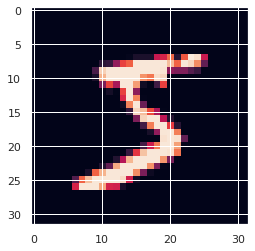

In [ ]:
image = np.asarray(train['features'][0]).squeeze()
plt.imshow(image)

In [ ]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
train['labels'] = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

In [ ]:
train_labels_count = np.unique(train['labels'], return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


In [ ]:
validation = {}
test = {}
train['features'], validation['features'], train['labels'], validation['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)
train['features'], test['features'], train['labels'], test['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])
X_test, y_test = test['features'], to_categorical(test['labels'])

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [ ]:
print('# of training images:', train['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

# of training images: 30720
# of validation images: 9600
Epoch 1/10
  2/240 [..............................] - ETA: 13s - loss: 0.0108 - accuracy: 0.9961

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


240/240 [==============================] - 15s 61ms/step - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.0151 - val_accuracy: 0.9950
Epoch 2/10
240/240 [==============================] - 15s 63ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0184 - val_accuracy: 0.9944
Epoch 3/10
240/240 [==============================] - 15s 62ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0124 - val_accuracy: 0.9957
Epoch 4/10
240/240 [==============================] - 15s 64ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0204 - val_accuracy: 0.9928
Epoch 5/10
240/240 [==============================] - 15s 63ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0199 - val_accuracy: 0.9927
Epoch 6/10
240/240 [==============================] - 15s 64ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 7/10
240/240 [==============================] - 16s 65ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0446 - val_accuracy: 0.9881
Epo

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

240/240 [==============================] - 3s 10ms/step - loss: 0.0359 - accuracy: 0.9885
Test loss: 0.03591860830783844
Test accuracy: 0.9885416626930237
